A successful campaign indicates by a number of users register on each campaign. Using the history of campaigns , we built a model to predict a number of users enroll for each.

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# 1. Loading Data

In [2]:
df = pd.read_csv('./Downloads/data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.shape

(9134, 24)

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


**Create engage column for response**

In [4]:
df['Engaged'] = df['Response'].apply(lambda x: 0 if x == 'No' else 1)
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


## Exploring Data Analysis

In [6]:
df.columns.values

array(['Customer', 'State', 'Customer Lifetime Value', 'Response',
       'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus',
       'Gender', 'Income', 'Location Code', 'Marital Status',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class',
       'Vehicle Size', 'Engaged'], dtype=object)


#### - Engagement Rate

In [7]:
engagement_rate_df = pd.DataFrame(
    df.groupby('Engaged').count()['Response'] / df.shape[0] * 100.0)

engagement_rate_df

,Response
Engaged,
0,85.679877
1,14.320123


In [8]:
# We can see that only 14% users registered on the campaign. We can illustrate by transposing the pivot table
engagement_rate_df.T

Engaged,0,1
Response,85.679877,14.320123


In [10]:
## Each reponse is related to corresponse offer. for example:

df[['Response','Renew Offer Type','Engaged']].head()

,Response,Renew Offer Type,Engaged
0,No,Offer1,0
1,No,Offer3,0
2,No,Offer1,0
3,No,Offer1,0
4,No,Offer1,0


**We can broke down the engaging by offer Type**

In [12]:
engagement_by_offer_type_df = pd.pivot_table(
    df, values='Response', index='Renew Offer Type', columns='Engaged', aggfunc=len).fillna(0.0)

engagement_by_offer_type_df.columns = ['Not Engaged', 'Engaged']

engagement_by_offer_type_df

,Not Engaged,Engaged
Renew Offer Type,,
Offer1,3158.0,594.0
Offer2,2242.0,684.0
Offer3,1402.0,30.0
Offer4,1024.0,0.0


#### Let visualize each portion of corresponsing offers for conversion and non conversion.

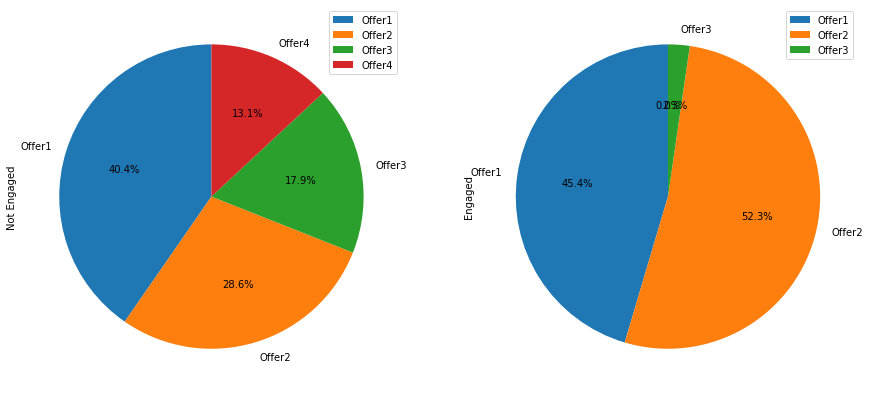

In [13]:
engagement_by_offer_type_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

In [15]:
# similar, let report the result of engage of sale channel.
df[['Response','Sales Channel','Engaged']].head()

,Response,Sales Channel,Engaged
0,No,Agent,0
1,No,Agent,0
2,No,Agent,0
3,No,Call Center,0
4,No,Agent,0


We are going to analyze how the engaged and non-engaged customers are distributed among different sales channels.

#### - By Sales Channel

In [14]:
engagement_by_sales_channel_df = pd.pivot_table(
    df, values='Response', index='Sales Channel', columns='Engaged', aggfunc=len
).fillna(0.0)

engagement_by_sales_channel_df.columns = ['Not Engaged', 'Engaged']
engagement_by_sales_channel_df

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


There are significantly more customers that are not engaged with the marketing efforts, so it is quite difficult to look at the differences in the sales channel distributions between the engaged and non-engaged customers from raw numbers. Let visualize the result

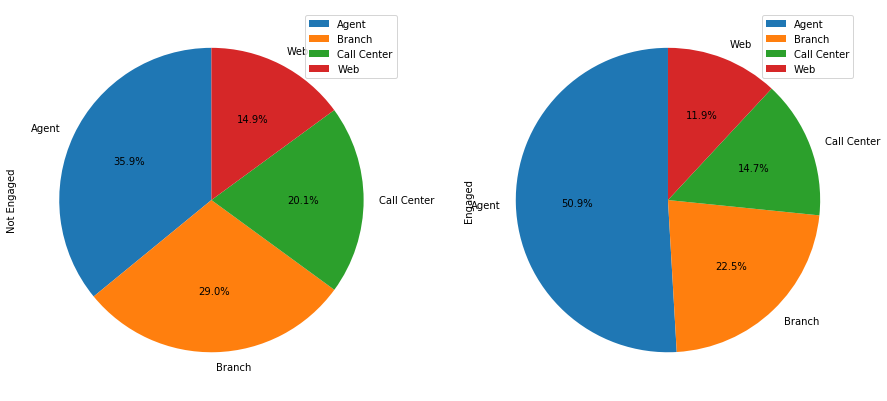

In [17]:
engagement_by_sales_channel_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

#### - Total Claim Amount Distributions

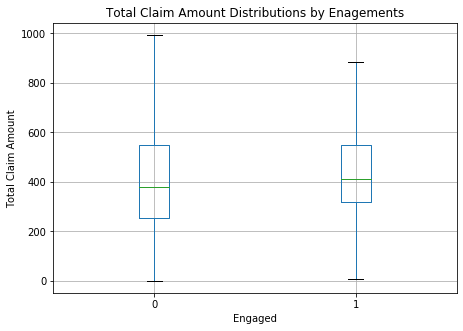

In [16]:
ax = df[['Engaged', 'Total Claim Amount']].boxplot(
    by='Engaged',
    showfliers=False,
    figsize=(7,5)
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Enagements')

plt.suptitle("")
plt.show()

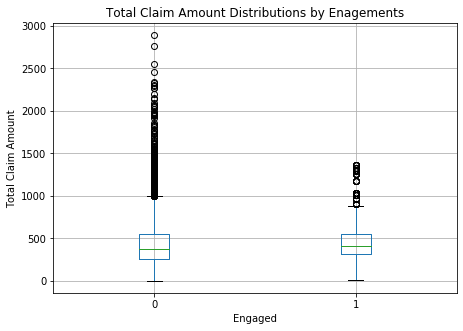

In [17]:
ax = df[['Engaged', 'Total Claim Amount']].boxplot(
    by='Engaged',
    showfliers=True,
    figsize=(7,5)
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Enagements')

plt.suptitle("")
plt.show()

#### - Income Distributions

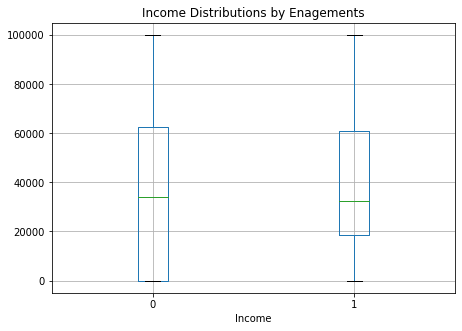

In [18]:
ax = df[['Engaged', 'Income']].boxplot(
    by='Engaged',
    showfliers=True,
    figsize=(7,5)
)

ax.set_xlabel('Engaged')
ax.set_xlabel('Income')
ax.set_title('Income Distributions by Enagements')

plt.suptitle("")
plt.show()

In [19]:
#  statistic summary of engage column 

df.groupby('Engaged').describe()['Income'].T

Engaged,0,1
count,7826.000000,1308.000000
mean,37509.190008,38544.027523
std,30752.259099,28043.637944
min,0.000000,0.000000
25%,0.000000,18495.000000
50%,34091.000000,32234.000000
75%,62454.250000,60880.000000
max,99981.000000,99845.000000


#### Simple Regression Analysis with Continuous Variables Only

In [22]:
import statsmodels.formula.api as sm

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [24]:
# Filter numeric columns only
con_df= df.select_dtypes(include =['float64','int64'])
con_df.columns.values

array(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount', 'Engaged'], dtype=object)

In [26]:
con_df = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 
    'Months Since Last Claim', 'Months Since Policy Inception', 
    'Number of Open Complaints', 'Number of Policies', 
    'Total Claim Amount'
]

In [38]:
con_df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
0,2763.519279,56274,69,32,5,0,1,384.811147,0
1,6979.535903,0,94,13,42,0,8,1131.464935,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0
3,7645.861827,0,106,18,65,0,7,529.881344,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0


In [35]:
con_df['Engaged']

0       0
1       0
2       0
3       0
4       0
       ..
9129    0
9130    1
9131    0
9132    0
9133    0
Name: Engaged, Length: 9134, dtype: int64

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(con_df.drop('Engaged', axis=1), con_df['Engaged'], test_size = 0.25)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [49]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score

def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance     = explained_variance_score(y_true, y_pred)
    mae    = mean_absolute_error(y_true, y_pred) 
    mse                    = mean_squared_error(y_true, y_pred) 
    msle = mean_squared_log_error(y_true, y_pred)
    median_ar  = median_absolute_error(y_true, y_pred)
    r2                     = r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(msle,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mae,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))


In [52]:

# Make predictions

predicted = lr.predict(X_test)
regression_results(y_test,predicted)

explained_variance:  0.0007
mean_squared_log_error:  0.0596
r2:  0.0007
MAE:  0.2444
MSE:  0.1213
RMSE:  0.3483


Finaly, we built a full model with both numeric and category variables.  

### Full  Regression model 

In [30]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


Most ml cannot work on categorical features, we will transform these into numeric values.

#### - Different ways to handle categorical variables   

* factorization

In [53]:
labels, levels = df['Education'].factorize()
labels

array([0, 0, 0, ..., 0, 1, 1])

In [54]:
levels

Index(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'], dtype='object')

 * Categorize variable series

In [55]:
categories = pd.Categorical(
    df['Education'], 
    categories=['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']
)
categories.categories

Index(['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor'], dtype='object')

In [56]:
categories.codes

array([1, 1, 1, ..., 1, 2, 2], dtype=int8)

*. dummy variables

In [57]:
pd.get_dummies(df['Education']).head()

,Bachelor,College,Doctor,High School or Below,Master
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


#### - Adding Gender

In [58]:
gender_values, gender_labels = df['Gender'].factorize()
df['GenderFactorized'] = gender_values
gender_values


array([0, 0, 0, ..., 1, 1, 1])

In [59]:
gender_labels

Index(['F', 'M'], dtype='object')

In [60]:
# Revisit data
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged,GenderFactorized
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,0,1
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,1,0
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,0,1
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,0,1


#### - Adding Education Level

In [61]:
df['EducationFactorized'] = categories.codes


In [62]:
df[['Customer Lifetime Value',
        'Income',
        'Monthly Premium Auto',
        'Months Since Last Claim',
        'Months Since Policy Inception',
        'Number of Open Complaints',
        'Number of Policies',
        'Total Claim Amount',
        'GenderFactorized',
        'EducationFactorized'
    ]]

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,GenderFactorized,EducationFactorized
0,2763.519279,56274,69,32,5,0,1,384.811147,0,1
1,6979.535903,0,94,13,42,0,8,1131.464935,0,1
2,12887.431650,48767,108,18,38,0,2,566.472247,0,1
3,7645.861827,0,106,18,65,0,7,529.881344,1,1
4,2813.692575,43836,73,12,44,0,1,138.130879,1,1
...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,1,1
9130,3096.511217,21604,79,14,28,0,1,379.200000,0,2
9131,8163.890428,0,85,9,37,3,2,790.784983,1,1
9132,7524.442436,21941,96,34,3,0,3,691.200000,1,2


In [63]:
X_train, X_test, y_train, y_test = train_test_split(df[['Customer Lifetime Value','Income',
        'Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception',
        'Number of Open Complaints','Number of Policies','Total Claim Amount',
        'GenderFactorized', 'EducationFactorized']], df['Engaged'], test_size = 0.25)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
# Make predictions

predicted = lr.predict(X_test)
regression_results(y_test,predicted)

explained_variance:  -0.0001
mean_squared_log_error:  0.0619
r2:  -0.0007
MAE:  0.2473
MSE:  0.1271
RMSE:  0.3565


Now we see that r2 is negative which indicates our model is worse than horizontal line. We may use nonlinear regression. Let look at  polynomial features for linear regression.

In [67]:
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 4) 

features = df[['Customer Lifetime Value','Income',
        'Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception',
        'Number of Open Complaints','Number of Policies','Total Claim Amount',
        'GenderFactorized', 'EducationFactorized']]
X_poly = poly.fit_transform(features )
  
    
    

In [75]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_poly, df['Engaged'], test_size = 0.25)
lr = LogisticRegression(solver='liblinear',max_iter=5000)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
# Make predictions

predicted = lr.predict(X_test)

predicted

array([0, 0, 0, ..., 0, 0, 0])